In [1]:
# 22K-8732 (Mudasir)
# Assignment-3 (LAB3)
# HomeTasks

**Upload Image for using in filters**

Saving Human_Image_Lab3_use.jpg to Human_Image_Lab3_use.jpg


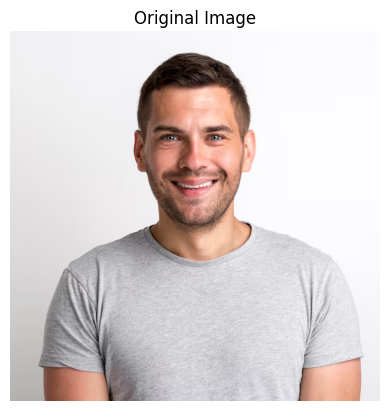

In [2]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

**Task 1** - ***"Complete the missing code snippets"***

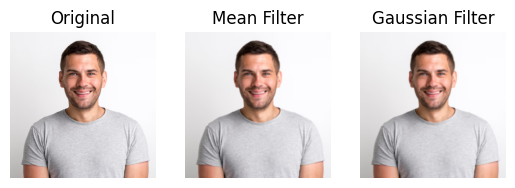

In [3]:
# Mean & Gaussian Filtering (Completed)

# Mean Filter
mean_filtered = cv2.blur(image, (5, 5))

# Gaussian Filter
sigma = 1.5
gaussian_filtered = cv2.GaussianBlur(image, (0, 0), sigma)

plt.subplot(1,3,1); plt.imshow(image); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mean_filtered); plt.title("Mean Filter"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(gaussian_filtered); plt.title("Gaussian Filter"); plt.axis("off")
plt.show()

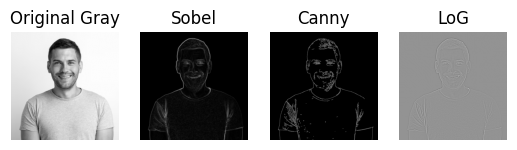

In [4]:
# Edge Detection (Sobel, Canny, LoG)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Sobel
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobel_x, sobel_y)

# Canny
canny = cv2.Canny(gray, 100, 200)

# Laplacian of Gaussian
smoothed = cv2.GaussianBlur(gray, (5,5), 1.5)
log = cv2.Laplacian(smoothed, cv2.CV_64F)

plt.subplot(1,4,1); plt.imshow(gray, cmap='gray'); plt.title("Original Gray"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sobel, cmap='gray'); plt.title("Sobel"); plt.axis("off")
plt.subplot(1,4,3); plt.imshow(canny, cmap='gray'); plt.title("Canny"); plt.axis("off")
plt.subplot(1,4,4); plt.imshow(log, cmap='gray'); plt.title("LoG"); plt.axis("off")
plt.show()

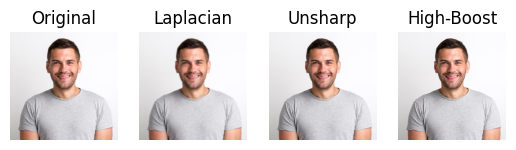

In [6]:
# Sharpening Filters (Completed)

# Laplacian Sharpening
laplacian = cv2.Laplacian(image, cv2.CV_64F)
# Convert image to float64 before adding
sharpen_laplacian = cv2.add(image.astype(np.float64), laplacian)
sharpen_laplacian = np.clip(sharpen_laplacian, 0, 255).astype(np.uint8)

# Unsharp Masking
blurred = cv2.GaussianBlur(image, (5,5), 0)
# Ensure both inputs are float64 before weighted addition
unsharp = cv2.addWeighted(image.astype(np.float64), 2, blurred.astype(np.float64), -1, 0)
unsharp = np.clip(unsharp, 0, 255).astype(np.uint8)

# High-Boost Filtering
A = 2
# Ensure both inputs are float64 before weighted addition
high_boost = cv2.addWeighted(image.astype(np.float64), A+1, blurred.astype(np.float64), -A, 0)
high_boost = np.clip(high_boost, 0, 255).astype(np.uint8)

plt.subplot(1,4,1); plt.imshow(image); plt.title("Original"); plt.axis("off")
plt.subplot(1,4,2); plt.imshow(sharpen_laplacian); plt.title("Laplacian"); plt.axis("off")
plt.subplot(1,4,3); plt.imshow(unsharp); plt.title("Unsharp"); plt.axis("off")
plt.subplot(1,4,4); plt.imshow(high_boost); plt.title("High-Boost"); plt.axis("off")
plt.show()

**Task 2** - ***Linear Filtering (Implementations)***

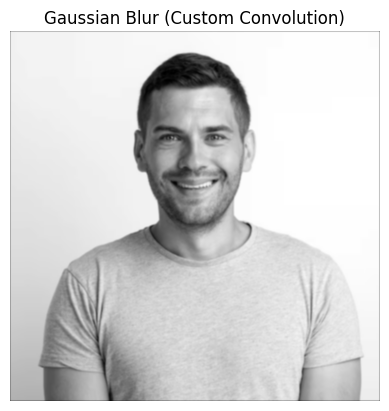

In [10]:
# Gaussian Blur (Custom Convolution)

def gaussian_kernel(size=5, sigma=1):
    ax = np.linspace(-(size-1)/2., (size-1)/2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
    return kernel/np.sum(kernel)

def convolve(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2
    padded = np.pad(image, ((pad_h,pad_h),(pad_w,pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            region = padded[y:y+kh, x:x+kw]
            output[y,x] = np.sum(region*kernel)
    return np.clip(output,0,255).astype(np.uint8)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
g_kernel = gaussian_kernel(5, sigma=1.5)
gaussian_custom = convolve(gray, g_kernel)

plt.imshow(gaussian_custom, cmap='gray')
plt.title("Gaussian Blur (Custom Convolution)")
plt.axis("off")
plt.show()

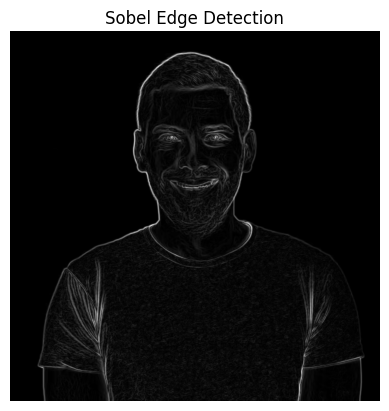

In [11]:
# Sobel Filter

sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobel_x, sobel_y)

plt.imshow(sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

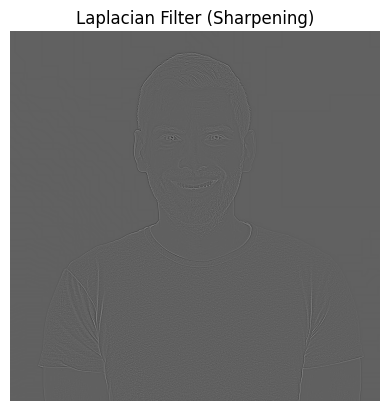

In [12]:
# Laplacian Filter (Sharpening)

laplacian = cv2.Laplacian(gray, cv2.CV_64F)
plt.imshow(laplacian, cmap='gray')
plt.title("Laplacian Filter (Sharpening)")
plt.axis("off")
plt.show()

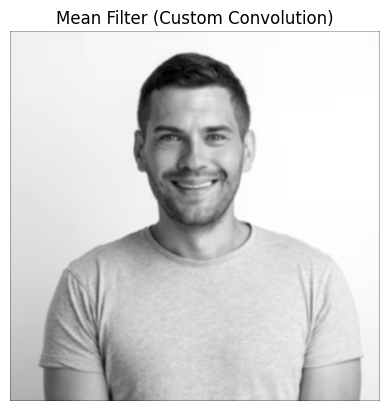

In [13]:
# Mean Filter (Custom Convolution)

mean_kernel = np.ones((5,5), np.float32) / 25.0
mean_custom = convolve(gray, mean_kernel)

plt.imshow(mean_custom, cmap='gray')
plt.title("Mean Filter (Custom Convolution)")
plt.axis("off")
plt.show()

**Task 3** - ***Non-Linear Filtering***

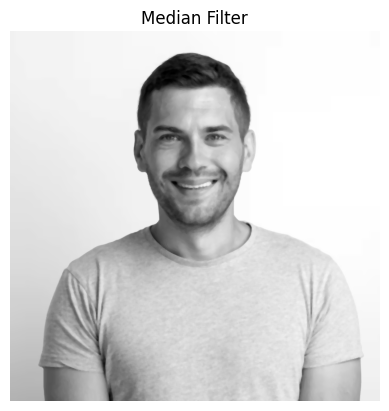

In [14]:
# Mean Filter (Custom Convolution)

median = cv2.medianBlur(gray, 5)
plt.imshow(median, cmap='gray')
plt.title("Median Filter")
plt.axis("off")
plt.show()

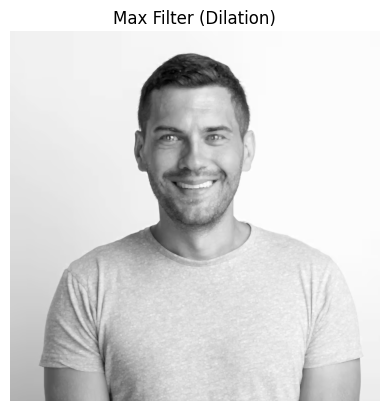

In [15]:
# Max Filter (Dilation)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
max_filter = cv2.dilate(gray, kernel)

plt.imshow(max_filter, cmap='gray')
plt.title("Max Filter (Dilation)")
plt.axis("off")
plt.show()

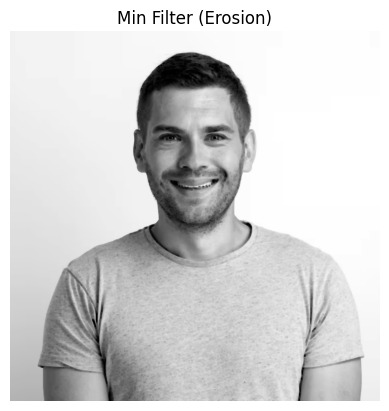

In [16]:
# Min Filter (Erosion)

min_filter = cv2.erode(gray, kernel)

plt.imshow(min_filter, cmap='gray')
plt.title("Min Filter (Erosion)")
plt.axis("off")
plt.show()

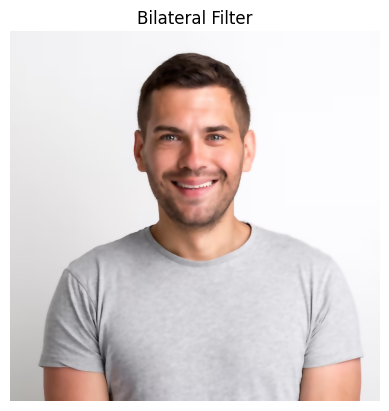

In [17]:
# Bilateral Filter

bilateral = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

plt.imshow(bilateral)
plt.title("Bilateral Filter")
plt.axis("off")
plt.show()

/tmp/ipython-input-461041496.py:15: RuntimeWarning: overflow encountered in scalar subtract
  B1, B2 = z_xy - z_min, z_xy - z_max


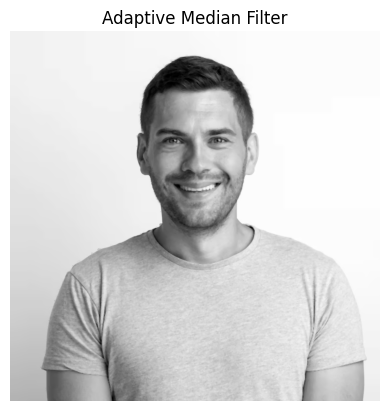

In [18]:
# Adaptive Median Filter

def adaptive_median_filter(img, max_kernel_size=7):
    padded = cv2.copyMakeBorder(img, max_kernel_size, max_kernel_size, max_kernel_size, max_kernel_size, cv2.BORDER_REFLECT)
    output = np.zeros_like(img)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            k = 3
            while k <= max_kernel_size:
                region = padded[y:y+k, x:x+k]
                z_min, z_max, z_med = np.min(region), np.max(region), np.median(region)
                z_xy = img[y, x]
                A1, A2 = z_med - z_min, z_med - z_max
                if A1 > 0 and A2 < 0:
                    B1, B2 = z_xy - z_min, z_xy - z_max
                    output[y, x] = z_xy if (B1 > 0 and B2 < 0) else z_med
                    break
                else:
                    k += 2
            if k > max_kernel_size:
                output[y, x] = z_med
    return output

adaptive_median = adaptive_median_filter(gray)
plt.imshow(adaptive_median, cmap='gray')
plt.title("Adaptive Median Filter")
plt.axis("off")
plt.show()